<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>ML & DL</b></center>

<center><b><h1>Lab - 8</b></center>    
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [1]:
# Core imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)
RANDOM_STATE = 42

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [2]:
# Load dataset
csv_path = Path("heart.csv")
df = pd.read_csv(csv_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [3]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumns:", df.columns.tolist())

Rows: 1025, Columns: 14

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
missing = df.isna().sum()
print(f"Duplicate rows: {df.duplicated().sum()}")
summary_missing = pd.DataFrame({
    "missing": missing,
    "missing_%": (missing / len(df) * 100).round(2),
})
summary_missing

Duplicate rows: 723


,missing,missing_%
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

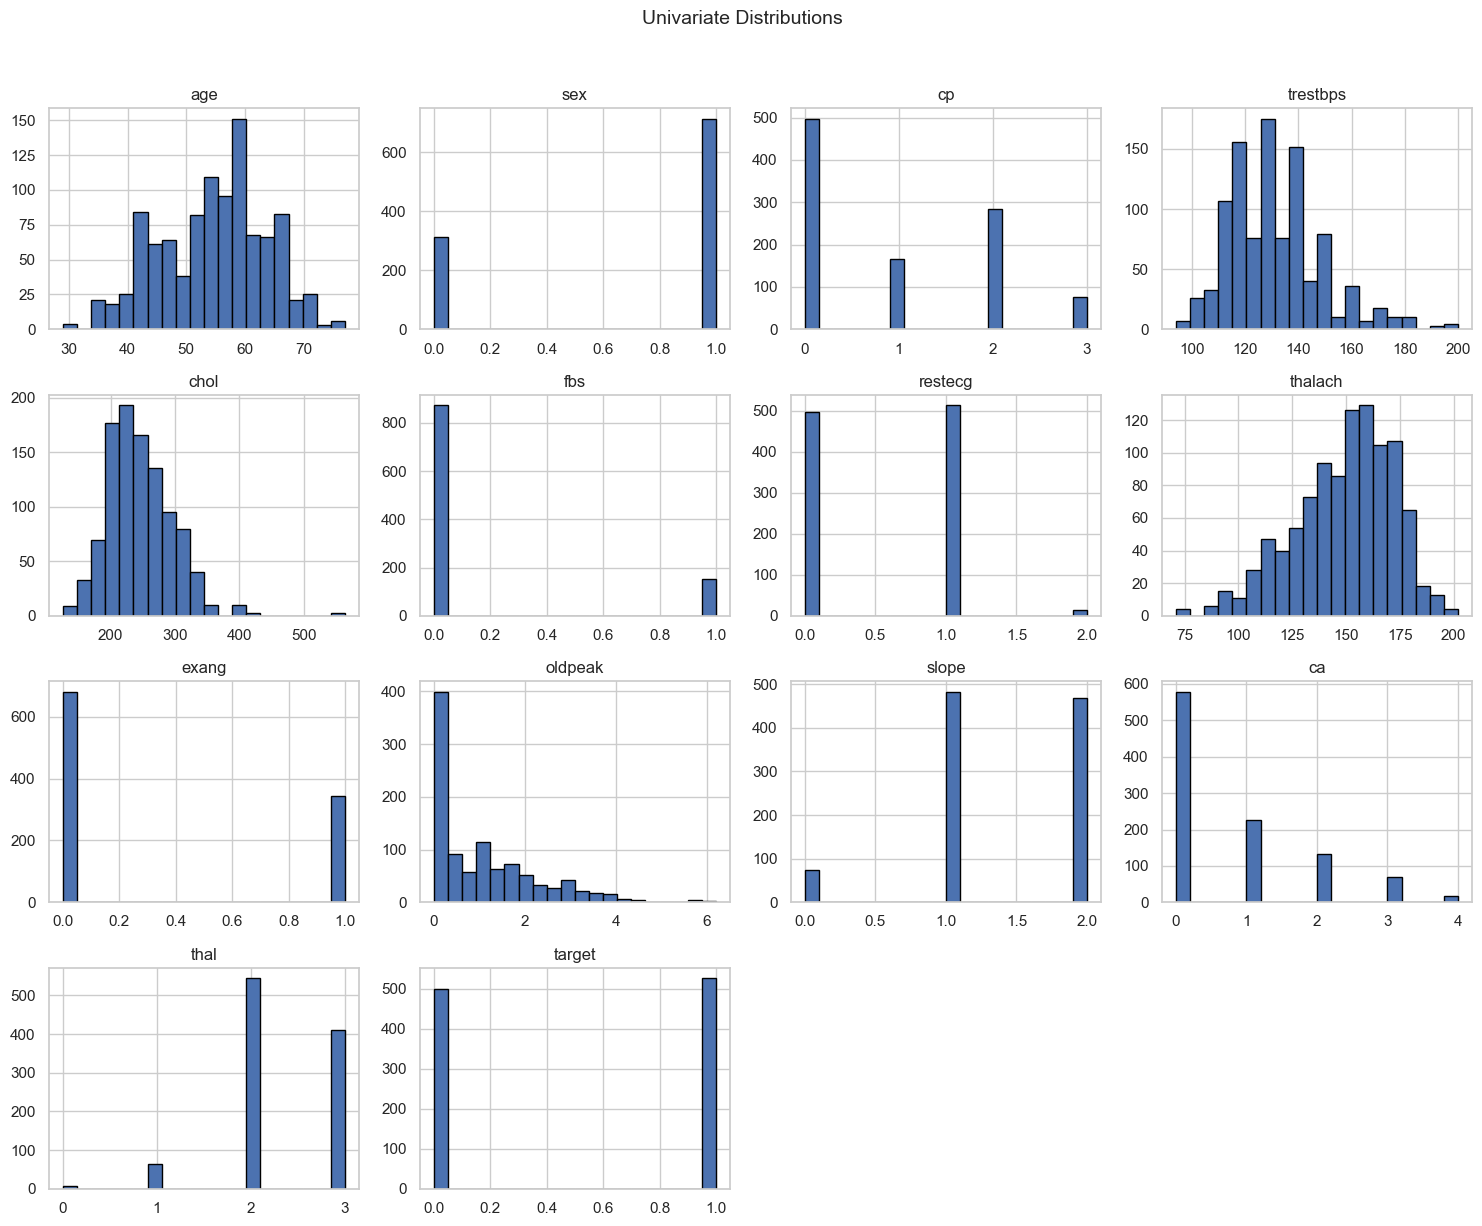

In [7]:
_ = df.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("Univariate Distributions", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

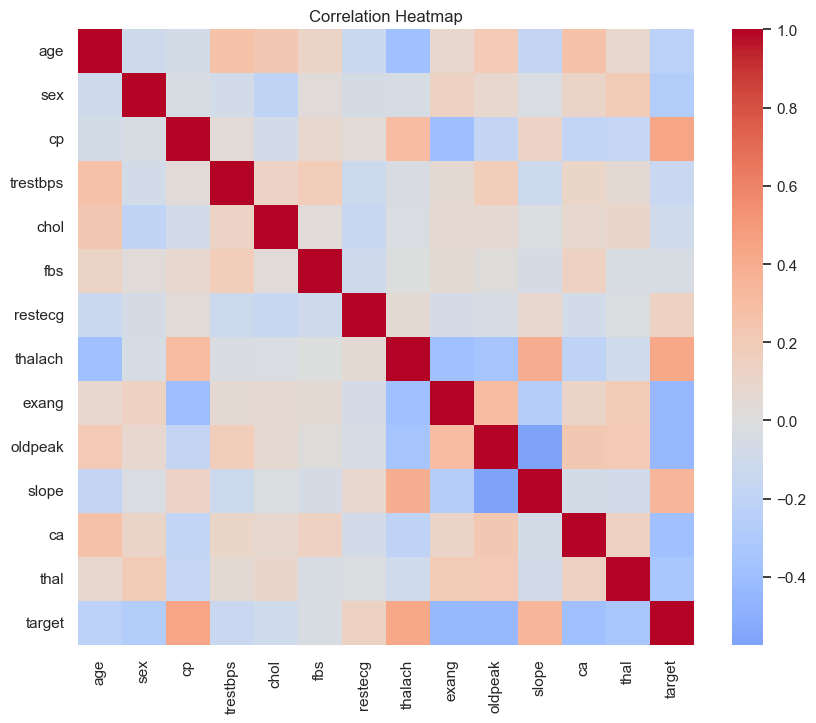

In [8]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, square=True)
plt.title("Correlation Heatmap")
plt.show()

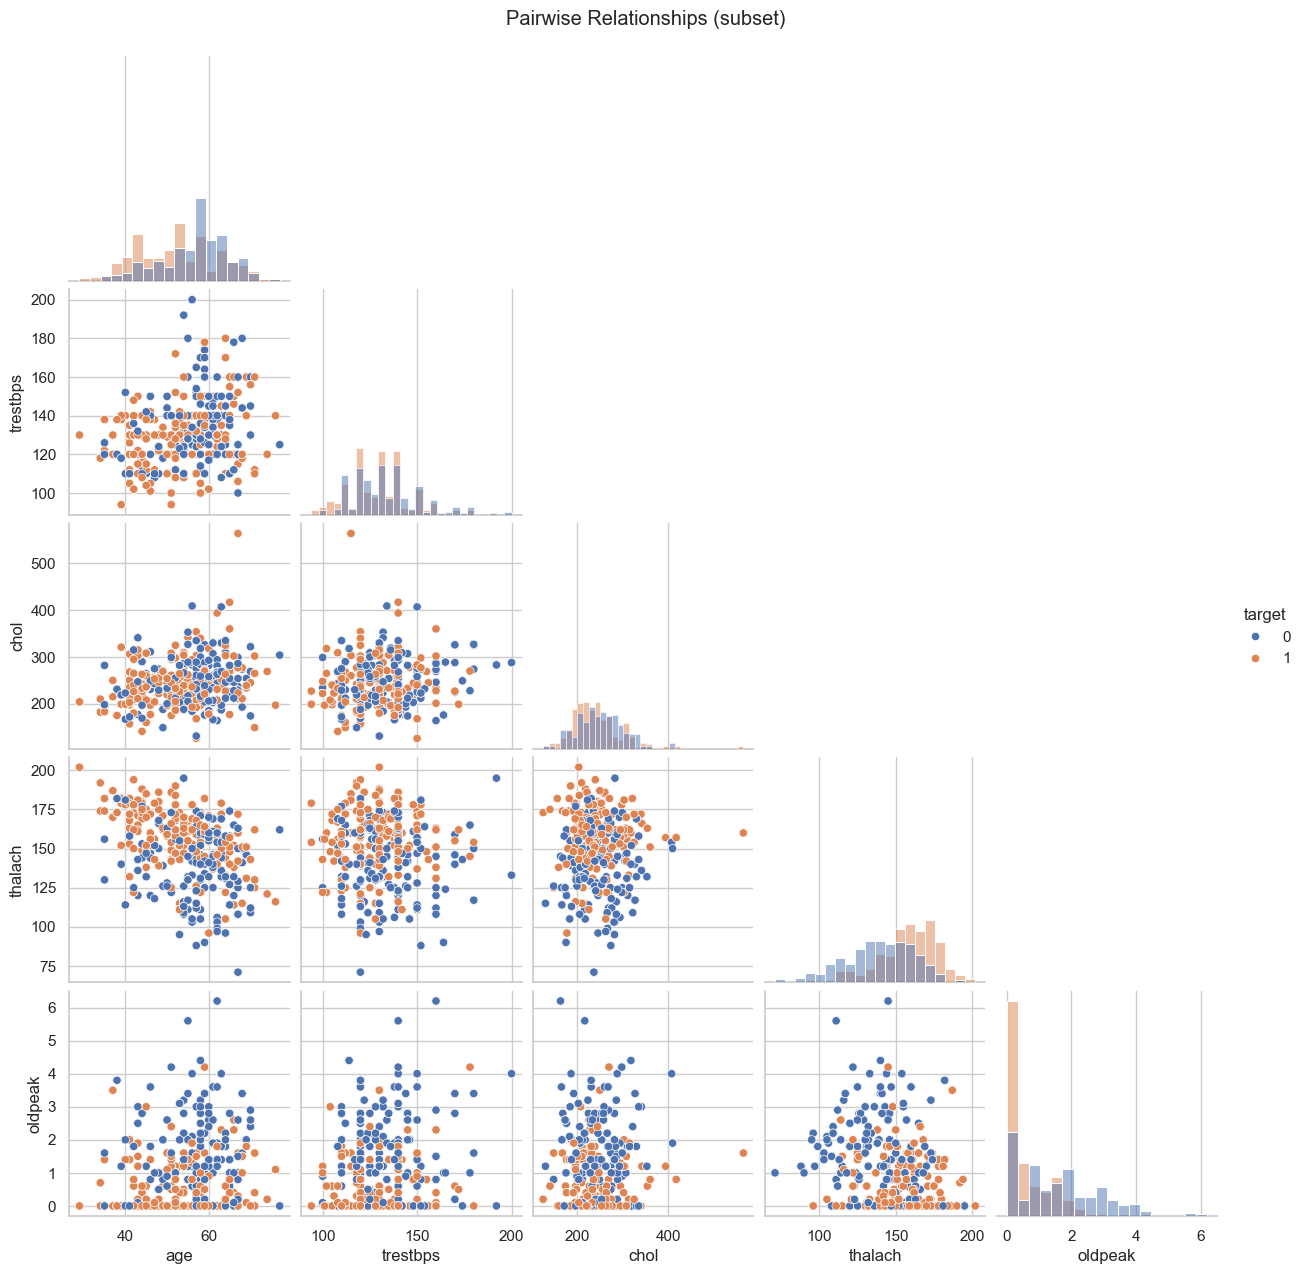

In [9]:
subset_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "target"]
sns.pairplot(df[subset_cols], hue="target", diag_kind="hist", corner=True)
plt.suptitle("Pairwise Relationships (subset)", y=1.02)
plt.show()

/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_38186/3984745765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


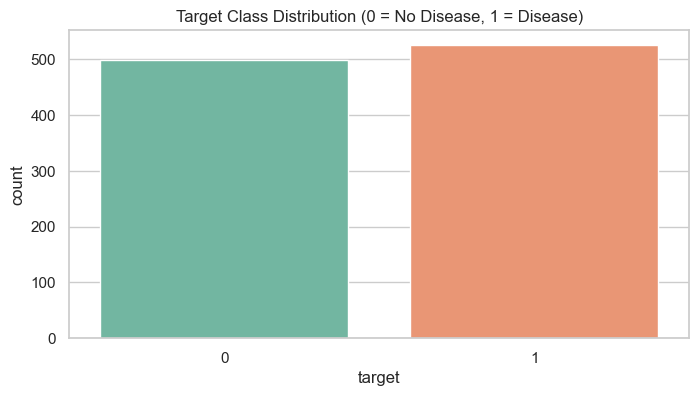

In [10]:
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Class Distribution (0 = No Disease, 1 = Disease)")
plt.show()

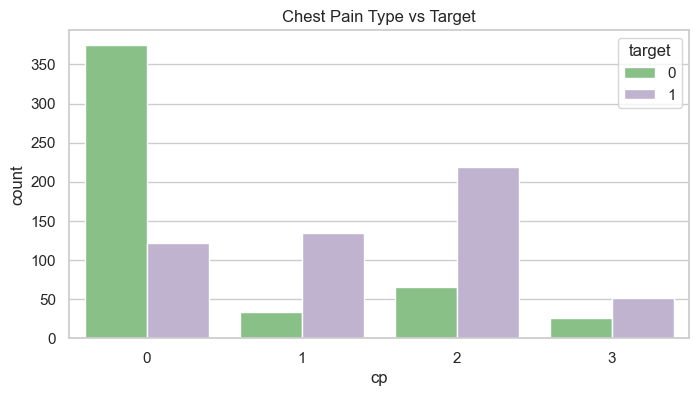

In [11]:
sns.countplot(x="cp", hue="target", data=df, palette="Accent")
plt.title("Chest Pain Type vs Target")
plt.show()

/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_38186/3170226071.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="target", y="age", data=df, inner="quartile", palette="Pastel1")


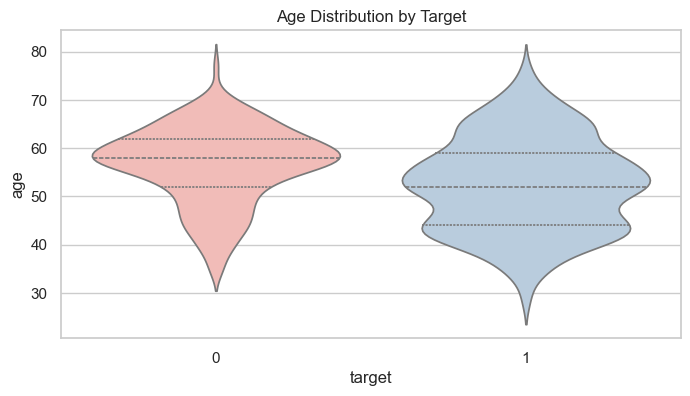

In [12]:
sns.violinplot(x="target", y="age", data=df, inner="quartile", palette="Pastel1")
plt.title("Age Distribution by Target")
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

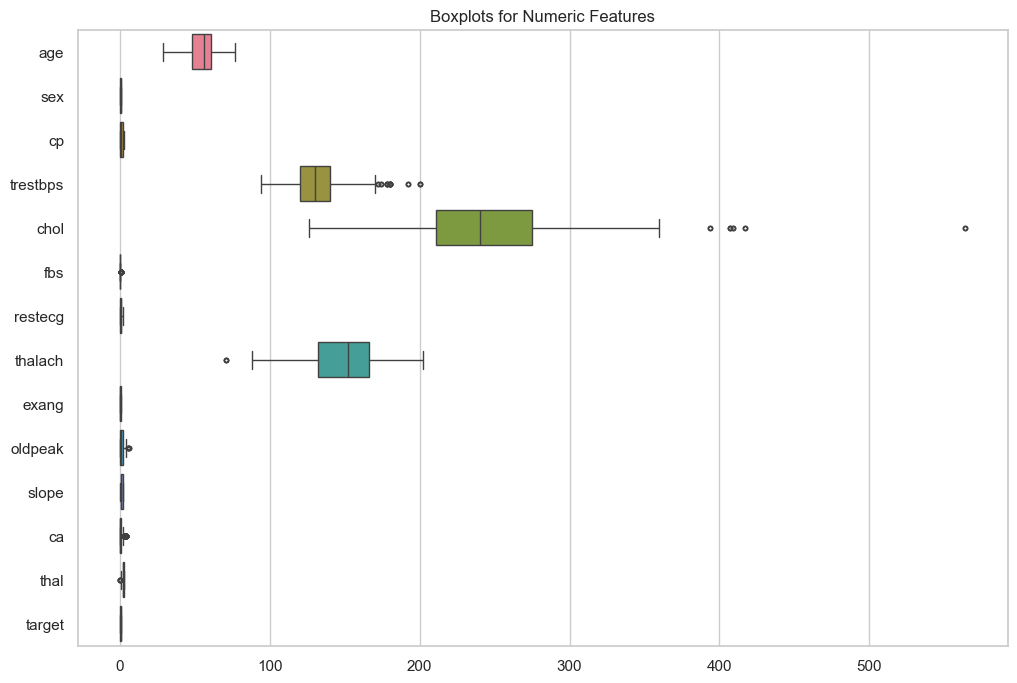

In [13]:
numeric_cols = df.columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols], orient="h", fliersize=3)
plt.title("Boxplots for Numeric Features")
plt.show()

In [14]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_counts = pd.Series((z_scores > 3).sum(axis=0), index=numeric_cols)
outlier_counts[outlier_counts > 0]

trestbps     7
chol        13
thalach      4
oldpeak      7
ca          18
thal         7
dtype: int64

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [15]:
X = df.drop(columns=["target"])
y = df["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (820, 13) Test shape: (205, 13)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print("Class balance - train:\n", y_train.value_counts(normalize=True).round(3))
print("\nClass balance - test:\n", y_test.value_counts(normalize=True).round(3))

Class balance - train:
 target
1    0.513
0    0.487
Name: proportion, dtype: float64

Class balance - test:
 target
1    0.512
0    0.488
Name: proportion, dtype: float64


# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [19]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [20]:
tree_acc = accuracy_score(y_test, tree_pred)
print(f"Decision Tree Accuracy: {tree_acc:.3f}")
print(classification_report(y_test, tree_pred))

Decision Tree Accuracy: 0.839
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



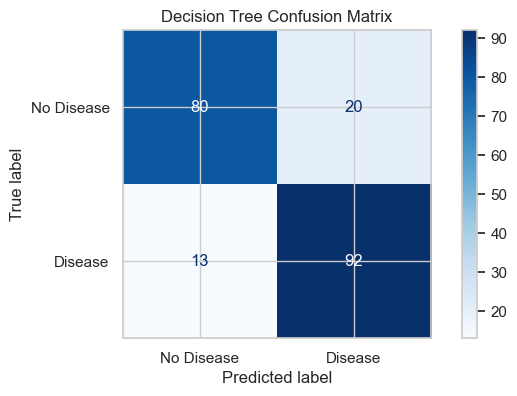

In [21]:
ConfusionMatrixDisplay.from_predictions(
    y_test, tree_pred, display_labels=["No Disease", "Disease"], cmap="Blues"
)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [23]:
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc:.3f}")
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.82      0.89      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



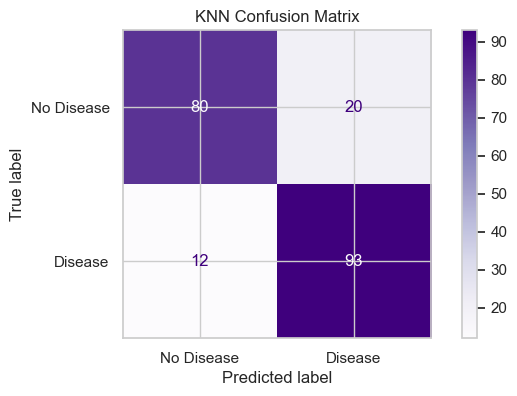

In [24]:
ConfusionMatrixDisplay.from_predictions(
    y_test, knn_pred, display_labels=["No Disease", "Disease"], cmap="Purples"
)
plt.title("KNN Confusion Matrix")
plt.show()

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [26]:
nb_acc = accuracy_score(y_test, nb_pred)
print(f"GaussianNB Accuracy: {nb_acc:.3f}")
print(classification_report(y_test, nb_pred))

GaussianNB Accuracy: 0.829
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



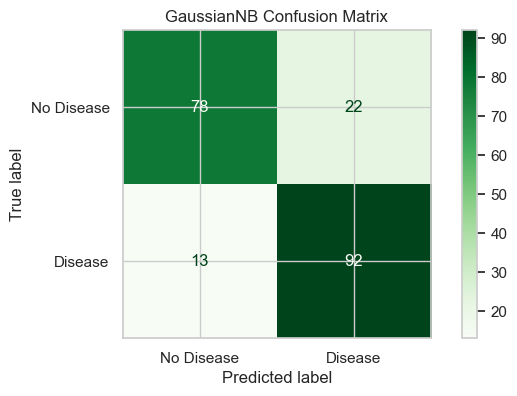

,Model,Accuracy
1,KNN,0.843902
0,Decision Tree,0.839024
2,GaussianNB,0.829268


In [27]:
ConfusionMatrixDisplay.from_predictions(
    y_test, nb_pred, display_labels=["No Disease", "Disease"], cmap="Greens"
)
plt.title("GaussianNB Confusion Matrix")
plt.show()

model_scores = pd.DataFrame(
    {
        "Model": ["Decision Tree", "KNN", "GaussianNB"],
        "Accuracy": [tree_acc, knn_acc, nb_acc],
    }
).sort_values("Accuracy", ascending=False)
model_scores

# Cross Validation

In [28]:
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
cv

KFold(n_splits=10, random_state=42, shuffle=True)

In [29]:
cv_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE),
    "KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier(n_neighbors=7))]),
    "GaussianNB": GaussianNB(),
}
cv_models

{'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier(n_neighbors=7))]),
 'GaussianNB': GaussianNB()}

In [30]:
cv_scores = {
    name: cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    for name, model in cv_models.items()
}
cv_scores

{'Decision Tree': array([0.80582524, 0.7961165 , 0.88349515, 0.89320388, 0.89320388,
        0.82352941, 0.88235294, 0.87254902, 0.8627451 , 0.82352941]),
 'KNN': array([0.7961165 , 0.86407767, 0.86407767, 0.87378641, 0.86407767,
        0.82352941, 0.87254902, 0.82352941, 0.81372549, 0.75490196]),
 'GaussianNB': array([0.7961165 , 0.7961165 , 0.85436893, 0.85436893, 0.7961165 ,
        0.79411765, 0.85294118, 0.88235294, 0.85294118, 0.7745098 ])}

In [31]:
cv_summary = pd.DataFrame(
    {
        name: [scores.mean(), scores.std()]
        for name, scores in cv_scores.items()
    },
    index=["mean_accuracy", "std"],
).T.sort_values("mean_accuracy", ascending=False)
cv_summary

,mean_accuracy,std
Decision Tree,0.853655,0.035630
KNN,0.835037,0.037542
GaussianNB,0.825395,0.035468


/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_38186/2287204898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_summary.index, y=cv_summary["mean_accuracy"], palette="viridis")


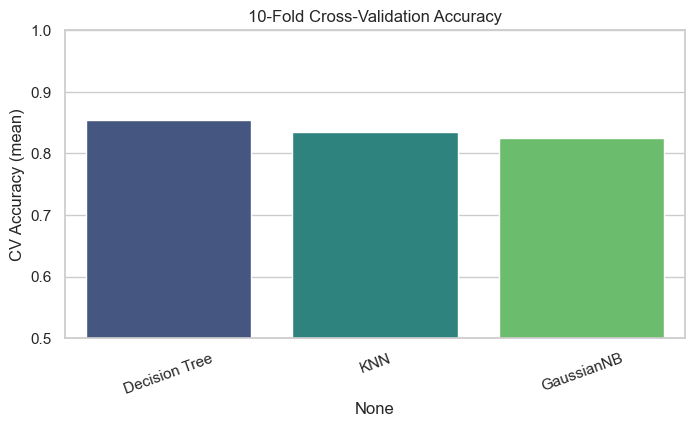

In [32]:
sns.barplot(x=cv_summary.index, y=cv_summary["mean_accuracy"], palette="viridis")
plt.ylabel("CV Accuracy (mean)")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=20)
plt.title("10-Fold Cross-Validation Accuracy")
plt.show()

In [33]:
best_model_name = cv_summary.index[0]
print(f"Best model by CV: {best_model_name}")

Best model by CV: Decision Tree


In [34]:
best_model = cv_models[best_model_name]
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
print(f"Test accuracy of best model ({best_model_name}): {best_acc:.3f}")

Test accuracy of best model (Decision Tree): 0.839


In [35]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



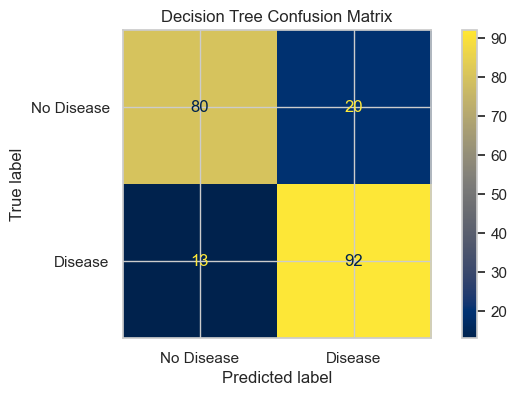

In [36]:
ConfusionMatrixDisplay.from_predictions(
    y_test, best_pred, display_labels=["No Disease", "Disease"], cmap="cividis"
)
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

In [37]:
sample_preds = pd.DataFrame(
    {
        "Actual": y_test.reset_index(drop=True),
        "Predicted": pd.Series(best_pred),
    }
)
sample_preds.head(10)

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,1
8,1,1
9,1,0


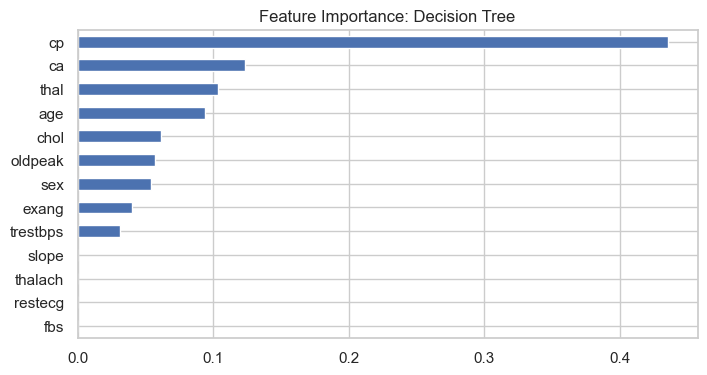

In [38]:
if hasattr(best_model, "feature_importances_"):
    pd.Series(best_model.feature_importances_, index=X.columns).sort_values().plot.barh()
    plt.title(f"Feature Importance: {best_model_name}")
    plt.show()
else:
    print("Feature importances not available for the selected model.")

In [39]:
new_samples = X.sample(3, random_state=RANDOM_STATE)
new_predictions = best_model.predict(new_samples)
new_samples.assign(prediction=new_predictions)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


# BS4 | web Scraping to get Data

In [40]:
# Simple web scraping example using BeautifulSoup
try:
    from bs4 import BeautifulSoup
except ImportError:  # install if not present
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "beautifulsoup4", "requests"])
    from bs4 import BeautifulSoup
import requests

url = "https://quotes.toscrape.com/"
resp = requests.get(url, timeout=10)
soup = BeautifulSoup(resp.text, "html.parser")
quotes = [
    {
        "quote": q.find("span", class_="text").get_text(strip=True),
        "author": q.find("small", class_="author").get_text(strip=True),
    }
    for q in soup.select("div.quote")
]
pd.DataFrame(quotes).head()

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
